In [52]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [53]:
sessions = pd.read_csv('sessions.csv')
sessions = sessions.fillna(0)

# reformat dates
sessions['date'] = pd.to_datetime(sessions.date)

In [54]:
sessions.columns

Index(['date', 'monkey', 'cycle', 'phase', 'loc', 'kg', 'hang', 'core',
       'block', 'arc', 'anta', 'legs', 'L-Sit', 'stable', 'max_full', 'total',
       'total6', '4', '5a', '5b', '5c', '6a', '6a+', '6b', '6b+', '6c', '6c+',
       '7a', '7a+', '4F2G', '3F2G', '16', '12', '15°', '35°', 'sloper',
       'pinch', '2F2G'],
      dtype='object')

In [55]:
sessions.head()

,date,monkey,cycle,phase,loc,kg,hang,core,block,arc,...,7a+,4F2G,3F2G,16,12,15°,35°,sloper,pinch,2F2G
0,2018-03-25,doripa,1,marathon,bb1,78.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-03-25,sunshine,1,marathon,bb1,60.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-03-27,doripa,1,technique,bf,78.0,0.0,0.0,0.0,0.0,...,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-03-29,doripa,1,4x4,bb2,78.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-03-29,sunshine,1,4x4,bb2,60.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
boulder_4 = 4
boulder_5a = 8
boulder_5b = 9
boulder_5c = 10

boulder_6a = 20
boulder_6a_plus = 21
boulder_6b = 30

boulder_6b_plus = 40
boulder_6c = 60
boulder_6c_plus = 70

boulder_7a = 100
boulder_7a_plus = 130

scores_translator = {
    # climbing
    '4': boulder_4,   
    '5a': boulder_5a,
    '5b': boulder_5b,
    '5c': boulder_5c,
    '6a': boulder_6a,
    '6a+': boulder_6a_plus,
    '6b': boulder_6b,
    '6b+': boulder_6b_plus,
    '6c': boulder_6c,
    '6c+': boulder_6c_plus,
    '7a': boulder_7a,
    '7a+': boulder_7a_plus,
    
    # gymnastics
    'block': boulder_6a_plus / 5,
    'core': boulder_6a / 5,
    'anta': boulder_5c / 5,
    'legs': boulder_5c / 5,
    'L-Sit': boulder_6b,
    
    # ARC
    'arc': boulder_6b_plus / 5,
    
    # Hangboard for each 10 seconds
    '4F2G': boulder_5c / 10,
    '3F2G': boulder_6a / 10,
    '2F2G': boulder_6a_plus / 10,
    
    # crimp in mm
    '16': boulder_6a_plus / 10,
    '12': boulder_6b_plus / 10,
    
    # slopers
    'sloper': boulder_6a / 10,
    '15°': boulder_6a / 10,
    '35°': boulder_6b_plus / 10,
    
    'pinch': boulder_6b_plus / 10,
}

hangboard = [
    '4F2G',
    '3F2G',
    '2F2G',
    '16',
    '12',
    'sloper',
    '15°',
    '35°',
    'pinch'
]

def calc_score(row):
    s = [row[key] * scores_translator[key] for key in scores_translator]
    return sum(s)


def calc_hangboard_scores(row):
    s = [row[key] * scores_translator[key] for key in hangboard]
    return sum(s)
        



In [57]:
scores = sessions.apply(calc_score, axis=1)
hangboard_scores = sessions.apply(calc_hangboard_scores, axis=1)
sessions['scores'] = scores
sessions['hang_scores'] = hangboard_scores
sessions

,date,monkey,cycle,phase,loc,kg,hang,core,block,arc,...,3F2G,16,12,15°,35°,sloper,pinch,2F2G,scores,hang_scores
0,2018-03-25,doripa,1,marathon,bb1,78.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1012.0,0.0
1,2018-03-25,sunshine,1,marathon,bb1,60.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,556.0,0.0
2,2018-03-27,doripa,1,technique,bf,78.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,572.0,0.0
3,2018-03-29,doripa,1,4x4,bb2,78.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,485.0,0.0
4,2018-03-29,sunshine,1,4x4,bb2,60.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194.0,0.0
5,2018-03-31,doripa,1,project,bf,78.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,687.0,0.0
6,2018-02-04,doripa,1,project,bb1,78.0,210.0,10.0,0.0,0.0,...,30.0,30.0,30.0,30.0,0.0,0.0,30.0,30.0,1432.0,516.0
7,2018-02-04,sunshine,1,project,home,59.0,252.0,0.0,0.0,0.0,...,42.0,84.0,0.0,42.0,0.0,0.0,0.0,0.0,428.4,428.4
8,2018-04-04,doripa,1,project,bf,78.0,0.0,30.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,913.0,0.0
9,2018-06-04,sunshine,1,project,home,59.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
doripa = sessions[sessions.monkey == 'doripa']
sunshine_sessions = sessions[sessions.monkey == 'sunshine']

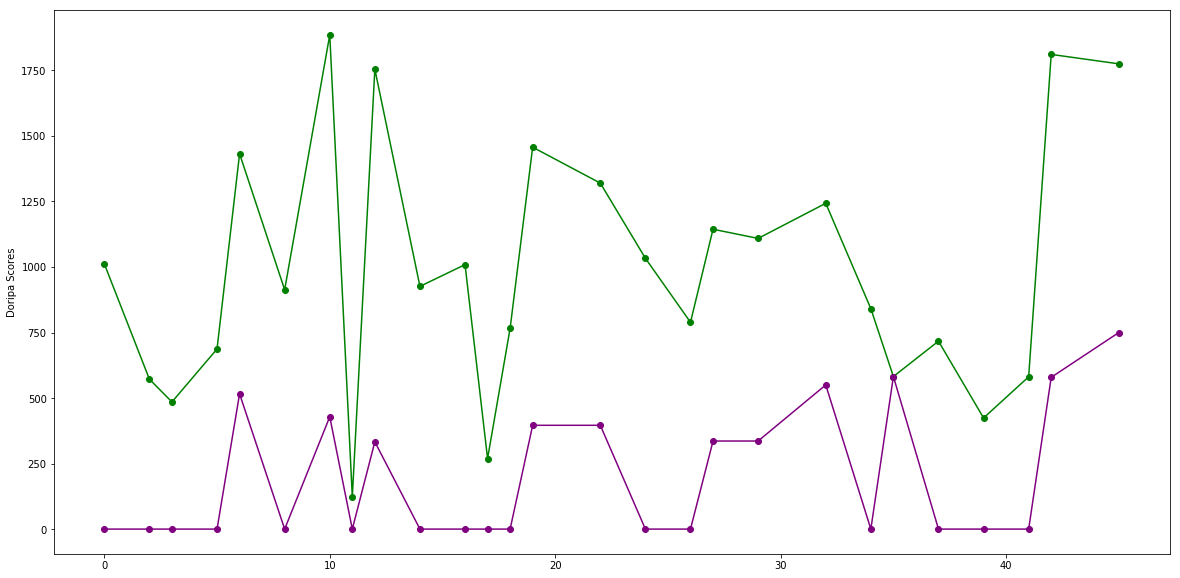

In [70]:
plt.figure(figsize=(20,10))
plt.plot(doripa.scores, marker='o', color='green')
plt.plot(doripa.hang_scores, marker='o', color='purple')
plt.ylabel('Doripa Scores')
plt.show()

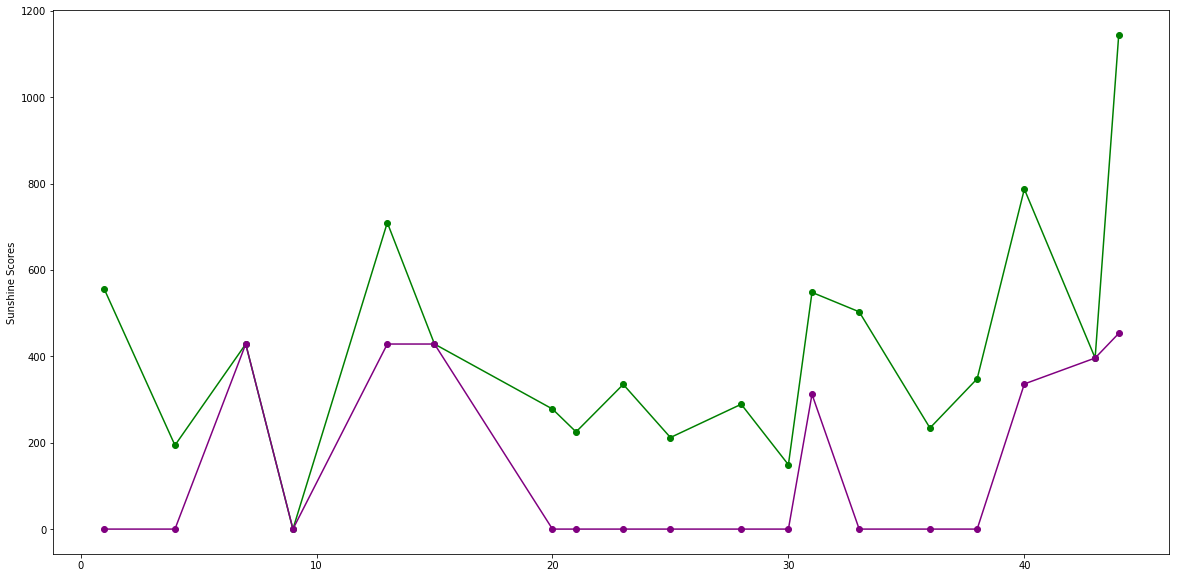

In [73]:
plt.figure(figsize=(20,10))
plt.plot(sunshine_sessions.scores,  marker='o', color='green')
plt.plot(sunshine_sessions.hang_scores, marker='o', color='purple')
# for future - take a look as well on the climbing score + gymnastics score
# for instance with matplotlib stackplot
plt.ylabel('Sunshine Scores')
plt.show()

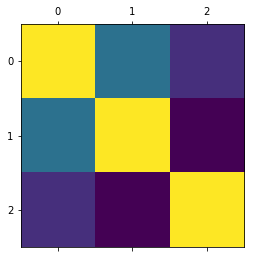

In [63]:
plt.matshow(doripa[['total', 'total6', 'scores']].corr());

In [64]:
doripa[['total', 'total6', 'scores']].corr()

,total,total6,scores
total,1.000000,0.657069,0.527176
total6,0.657069,1.000000,0.453504
scores,0.527176,0.453504,1.000000


In [65]:
doripa['total'].corr(doripa['total6'])

0.65706880520499944

In [66]:
doripa['total'].corr(doripa['scores'])

0.52717619533662363

In [67]:
doripa['scores'].corr(doripa['total6'])

0.45350412065146645

In [68]:
sunshine_sessions.corr()['scores']

cycle          0.059902
kg            -0.045002
hang           0.599141
core           0.615752
block          0.726287
arc                 NaN
anta           0.323604
legs          -0.067694
L-Sit          0.255152
total          0.334066
total6         0.263267
4              0.078105
5a             0.137242
5b             0.549981
5c             0.144317
6a             0.176832
6a+            0.241468
6b             0.156126
6b+            0.215104
6c             0.085782
6c+                 NaN
7a            -0.197307
7a+                 NaN
4F2G           0.434826
3F2G           0.569050
16             0.473381
12                  NaN
15°            0.576746
35°            0.661672
sloper         0.128103
pinch               NaN
2F2G                NaN
scores         1.000000
hang_scores    0.681736
Name: scores, dtype: float64

In [69]:
doripa.corr()['scores']

cycle          0.124023
kg            -0.034417
hang           0.712395
core           0.629555
block          0.587369
arc            0.344129
anta           0.539839
legs           0.019131
L-Sit          0.318732
total          0.527176
total6         0.453504
4              0.184688
5a             0.097200
5b             0.263753
5c             0.243972
6a             0.343200
6a+            0.266249
6b             0.326328
6b+            0.327335
6c             0.140374
6c+            0.244785
7a             0.255298
7a+           -0.074066
4F2G           0.749051
3F2G           0.739355
16             0.458291
12             0.365217
15°            0.325098
35°            0.493012
sloper              NaN
pinch          0.422175
2F2G           0.185767
scores         1.000000
hang_scores    0.722062
Name: scores, dtype: float64